In [ ]:
#import Library

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


Link dataset   :https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data




Dataset yang saya pakai merupakan kumpulan data yang digunakan untuk klasifikasi serangan jantung (heart attack).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")

# Menampilkan shape dari data yg kita punya
print('dataset:', (str(data.shape)))

data

dataset: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Terdapat 13 feature:
*   age
*   sex
*   cp
*   trtbps
*   chol
*   fbs
*   restecg
*   thalachh
*   exng
*   oldpeak
*   slp
*   caa
*   thall

dan satu label, yakni Output:
*   Label 0 = less chance of heart attack
*   Label 1 = more chance of heart attack




# **Data Exploration**
Memisahkan Features(X) dengan Label(y)

In [ ]:
X = data.drop('output', axis=1) #Features
y = data['output'] #Target

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (303, 13)
Shape of y: (303,)


# **Splitting Data**

Memisahkan antar data training dan data testing dengan proporsi **80-20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set :" , X_train.shape, y_train.shape)
print("Test set  :" , X_test.shape, y_test.shape)

Train set : (242, 13) (242,)
Test set  : (61, 13) (61,)


# **Modeling: Klasifikasi Decision Tree**


In [ ]:
# Model dengan hyperparameter default
model_default = DecisionTreeClassifier(random_state=42)
model_default.fit(X_train, y_train)

# Model dengan tuning hyperparameter default
model_DT = DecisionTreeClassifier (criterion='entropy', max_depth=3, max_leaf_nodes=4, random_state=25)
model_DT = model_DT.fit(X_train, y_train)

#**Evaluation**


In [ ]:
# hasil prediksi training set
y_pred_train_default = model_default.predict(X_train)

#hasil prediksi test set
y_pred_default = model_default.predict(X_test)

#Train set score
print("Train Accuracy :", metrics.accuracy_score(y_train, y_pred_train_default))
print("Train Precission:", metrics.accuracy_score(y_train, y_pred_train_default))
print("Train Recall :", metrics.accuracy_score(y_train, y_pred_train_default), '\n')

#Test set score
print("Test Accuracy :", metrics.accuracy_score(y_test, y_pred_default))
print("Test Precission:", metrics.accuracy_score(y_test, y_pred_default))
print("Test Recall :", metrics.accuracy_score(y_test, y_pred_default))

Train Accuracy : 1.0
Train Precission: 1.0
Train Recall : 1.0 

Test Accuracy : 0.7540983606557377
Test Precission: 0.7540983606557377
Test Recall : 0.7540983606557377


In [ ]:
# hasil prediksi training set tuning hyperparameter
y_pred_train= model_DT.predict(X_train)

#hasil prediksi test set
y_pred = model_DT.predict(X_test)

#Train set score
print("Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Train Precission:", metrics.accuracy_score(y_train, y_pred_train))
print("Train Recall ", metrics.accuracy_score(y_train, y_pred_train), '\n')

#Test set score
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Test Precission:", metrics.accuracy_score(y_test, y_pred))
print("Test Recall :", metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.8099173553719008
Train Precission: 0.8099173553719008
Train Recall  0.8099173553719008 

Test Accuracy: 0.8360655737704918
Test Precission: 0.8360655737704918
Test Recall : 0.8360655737704918


# **Generate classification report**


In [ ]:
nama_label = ['less change of heart attack', 'more change of heart attack']
print('Classification Report Model dengan Hyperparameter Default:\n')
print(classification_report(y_test, y_pred_default, target_names=nama_label))
print('\n\nClassification Report Model dengan Tuning Hyperparameter: \n')
print(classification_report(y_test, y_pred, target_names=nama_label))

Classification Report Model dengan Hyperparameter Default:

                             precision    recall  f1-score   support

less change of heart attack       0.69      0.86      0.77        29
more change of heart attack       0.84      0.66      0.74        32

                   accuracy                           0.75        61
                  macro avg       0.77      0.76      0.75        61
               weighted avg       0.77      0.75      0.75        61



Classification Report Model dengan Tuning Hyperparameter: 

                             precision    recall  f1-score   support

less change of heart attack       0.85      0.79      0.82        29
more change of heart attack       0.82      0.88      0.85        32

                   accuracy                           0.84        61
                  macro avg       0.84      0.83      0.83        61
               weighted avg       0.84      0.84      0.84        61



# **Men-Generate Tree**

Tree model dengan hyperparameter default

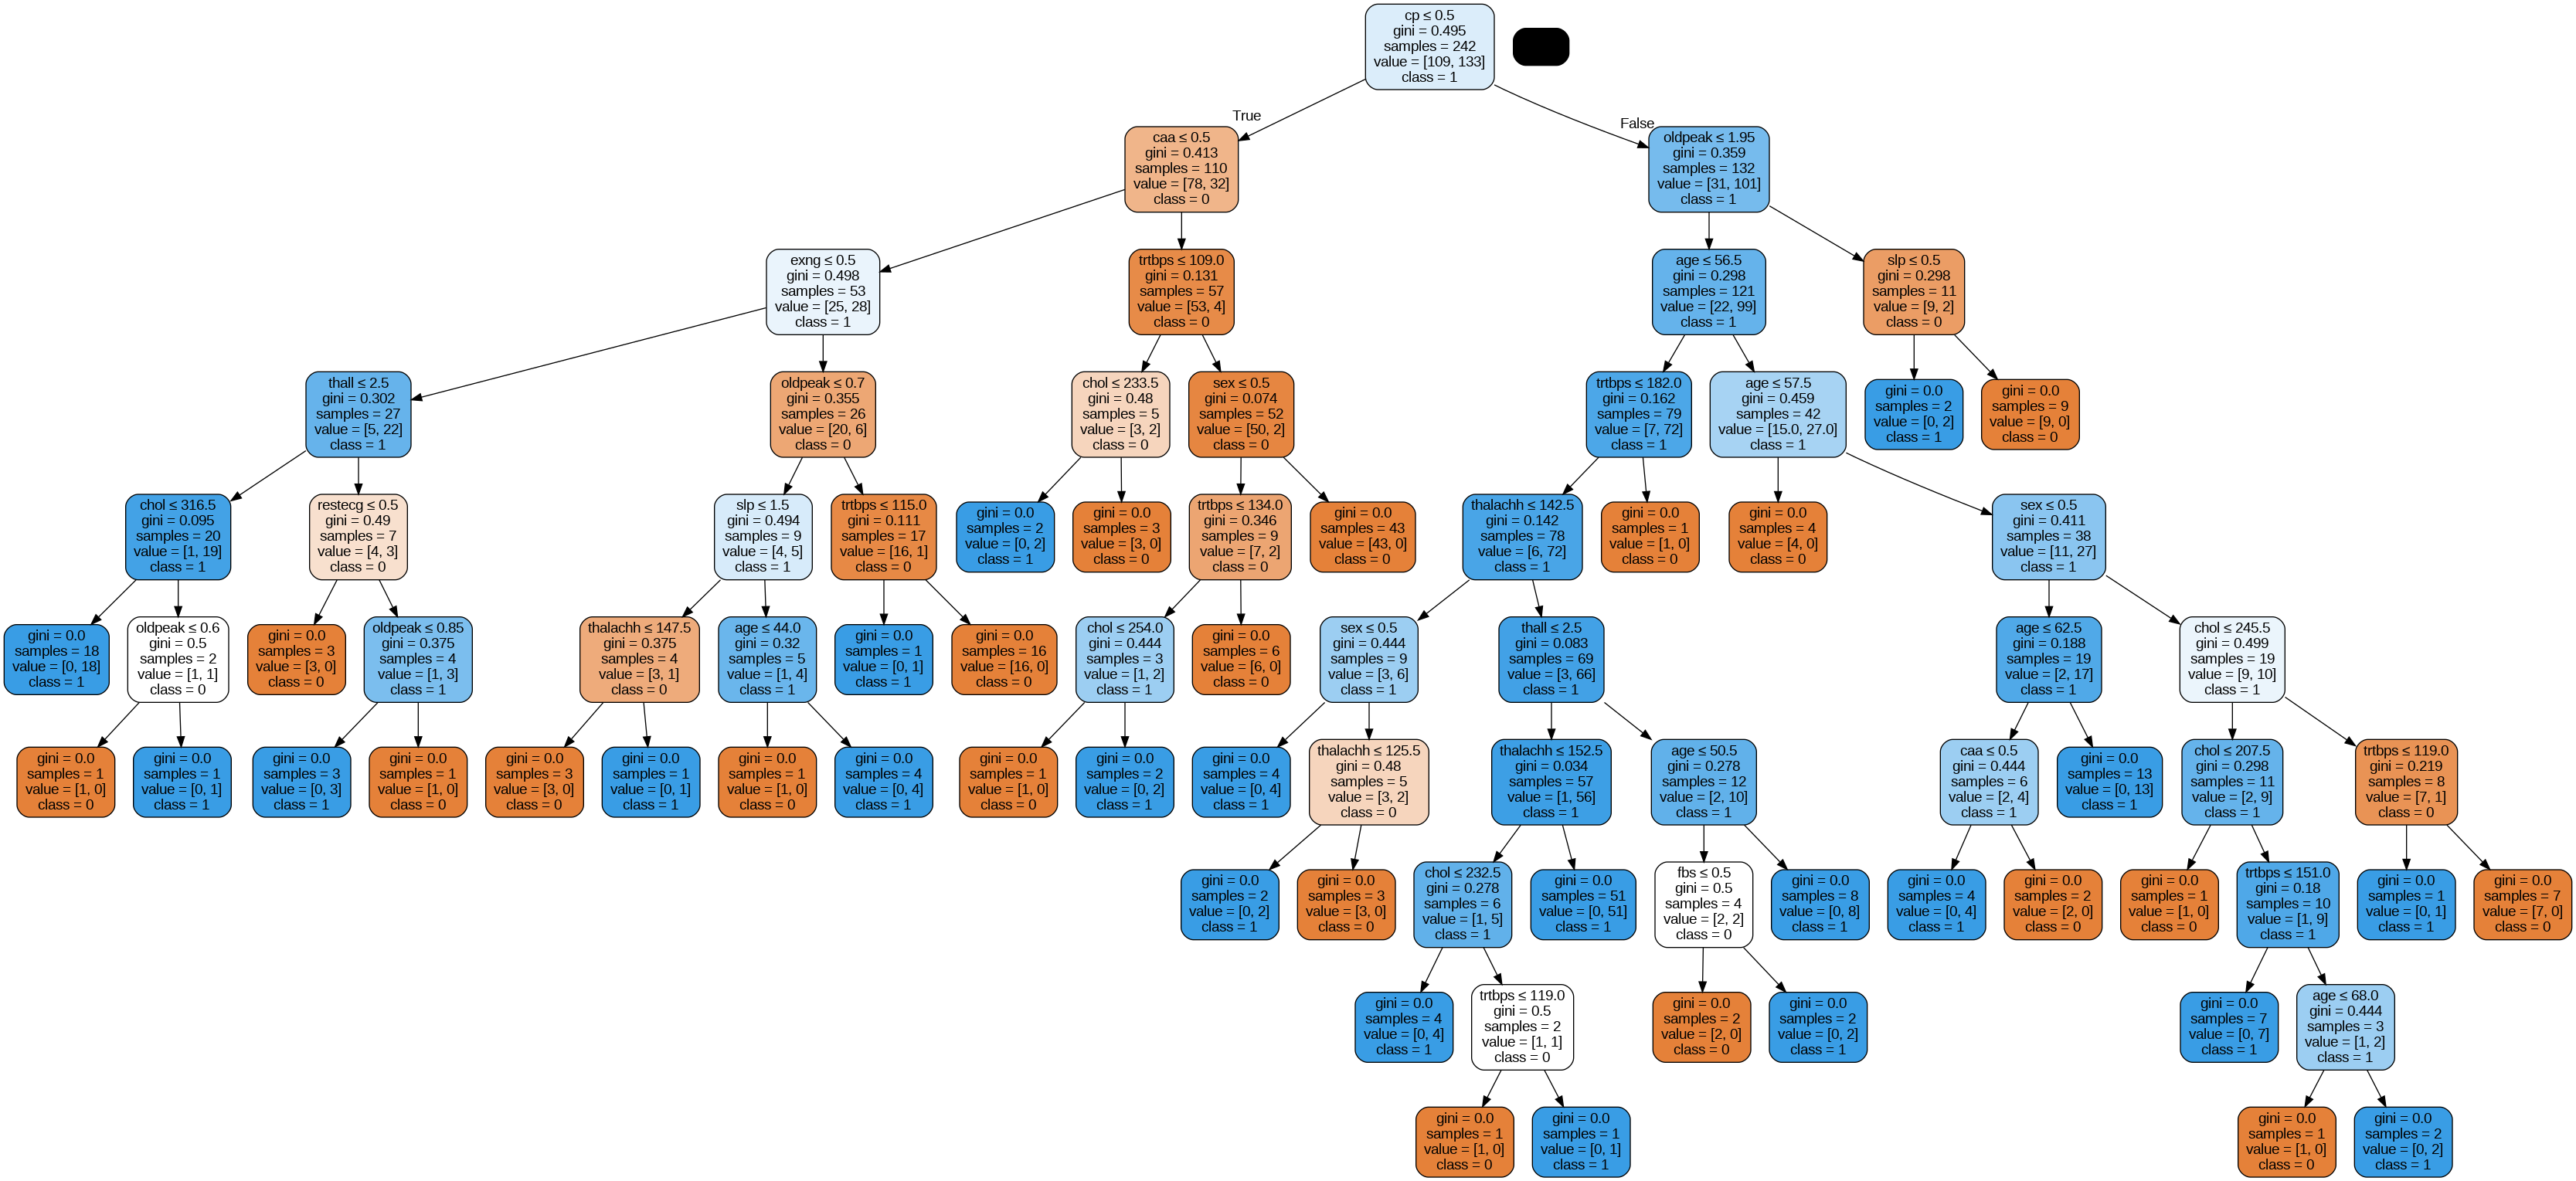

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
dot_data = StringIO()


export_graphviz(model_default,
                out_file = dot_data,
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = feature_cols,
                class_names = ['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('tree_model_default.png')

Image(graph.create_png())

Tree model dengan tuning hyperparameter

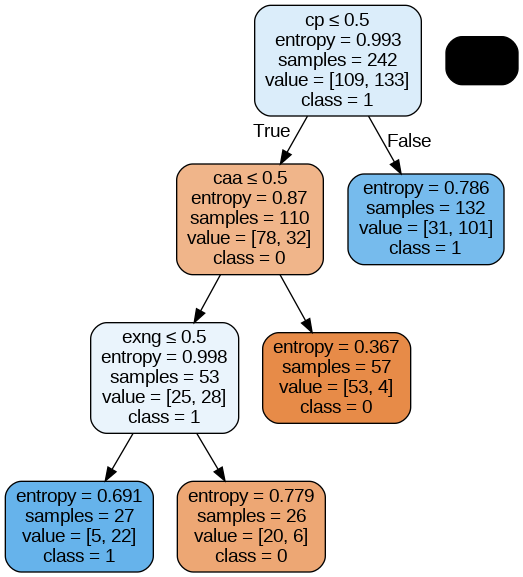

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file = dot_data,
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = feature_cols,
                class_names = ['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('tree_model_default.png')

Image(graph.create_png())

In [ ]:
nama_label = ['less change of heart attack', 'more change of heart attack']
print('Classification Report Model dengan Hyperparameter Default:\n')
print(classification_report(y_test, y_pred_default, target_names=nama_label))
print('\n\nClassification Report Model dengan Tuning Hyperparameter: \n')
print(classification_report(y_test, y_pred, target_names=nama_label))


Classification Report Model dengan Hyperparameter Default:

                             precision    recall  f1-score   support

less change of heart attack       0.69      0.86      0.77        29
more change of heart attack       0.84      0.66      0.74        32

                   accuracy                           0.75        61
                  macro avg       0.77      0.76      0.75        61
               weighted avg       0.77      0.75      0.75        61



Classification Report Model dengan Tuning Hyperparameter: 

                             precision    recall  f1-score   support

less change of heart attack       0.85      0.79      0.82        29
more change of heart attack       0.82      0.88      0.85        32

                   accuracy                           0.84        61
                  macro avg       0.84      0.83      0.83        61
               weighted avg       0.84      0.84      0.84        61



# Imporantance Feature

Feature: age Score: 0.10673469302408455 %
Feature: sex Score: 0.04101488601221759 %
Feature: cp Score: 0.2252626980294773 %
Feature: trtbps Score: 0.08139401845786266 %
Feature: chol Score: 0.09367909149987476 %
Feature: fbs Score: 0.01669310891908671 %
Feature: restecg Score: 0.016096926457690758 %
Feature: thalachh Score: 0.046206844795284654 %
Feature: exng Score: 0.07542094310859741 %
Feature: oldpeak Score: 0.11326807338964012 %
Feature: slp Score: 0.038537475186437055 %
Feature: caa Score: 0.11847762131018363 %
Feature: thall Score: 0.027213619809562908 %


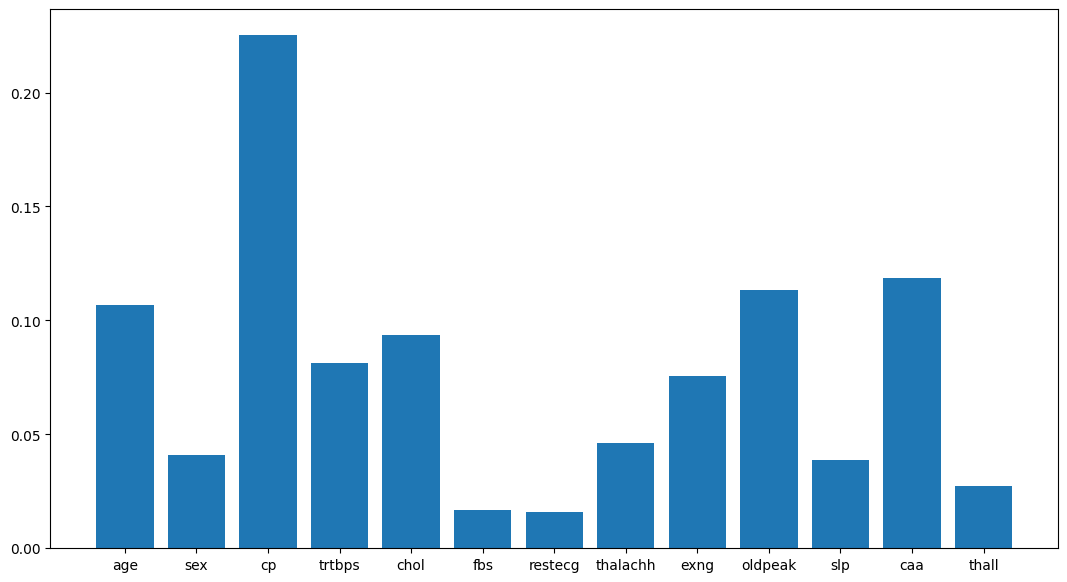

In [ ]:
importance = model_default.feature_importances_ # khusus model dengan hyperparanter default
for i,v in enumerate(importance):
  print('Feature:', feature_cols[i], 'Score:', v, '%')
#Membuat plot
plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], importance)
plt.show()

Didapatkan bahwa atribut/features Chest Pain menjadi feature paling penting dalam model ini.

# Kesimpulan

Decision Tree adalah algoritma dalam supervised learning yang digunakan untuk klasifikasi dan regresi dengan membangun model berbentuk pohon dari dataset. Dalam struktur pohon ini, setiap simpul (node) mewakili fitur dari data, setiap cabang (branch) mewakili keputusan berdasarkan fitur tersebut, dan setiap daun (leaf) mewakili hasil prediksi. Proses pembuatan Decision Tree dimulai dengan memilih fitur paling informatif menggunakan metrik seperti Gini impurity atau entropy, dan berlanjut hingga data terklasifikasi atau batas tertentu tercapai.

Pemilihan hyperparameter yang tepat sangat penting untuk meningkatkan performa model Decision Tree. Beberapa hyperparameter kunci meliputi kedalaman pohon (max_depth), jumlah minimum sampel untuk pembagian node (min_samples_split), dan jumlah minimum sampel di node daun (min_samples_leaf). Dengan menggunakan teknik seperti Grid Search atau Random Search, kita dapat melakukan tuning hyperparameter untuk menemukan kombinasi optimal, sehingga model dapat lebih robust dan akurat dalam memprediksi data baru. Decision Tree, dengan pengaturan hyperparameter yang tepat, menjadi alat yang efektif dalam analisis data.



In [ ]:
model_default = DecisionTreeClassifier(random_state=42)
model_default.fit(X_train, y_train)

# Function to get user input
def get_user_input():
    print("Please enter the following information:")
    age = float(input("Age: "))
    sex = int(input("Sex (1 for male, 0 for female): "))
    cp = int(input("Chest pain type (0-3): "))
    trtbps = float(input("Resting blood pressure: "))
    chol = float(input("Serum cholesterol in mg/dl: "))
    fbs = int(input("Fasting blood sugar > 120 mg/dl (1 for true, 0 for false): "))
    restecg = int(input("Resting electrocardiographic results (0-2): "))
    thalachh = float(input("Maximum heart rate achieved: "))
    exng = int(input("Exercise induced angina (1 for yes, 0 for no): "))
    oldpeak = float(input("ST depression induced by exercise relative to rest: "))
    slp = int(input("The slope of the peak exercise ST segment (0-2): "))
    caa = int(input("Number of major vessels (0-3) colored by flourosopy: "))
    thall = int(input("Thalassemia (0-3): "))

    return [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall]

# Get user input
user_data = [get_user_input()]

# Make prediction
prediction = model_default.predict(user_data)

# Print result
if prediction[0] == 1:
    print("\nThe person is at risk of heart disease.")
else:
    print("\nThe person is not at risk of heart disease.")

Please enter the following information:
Age: 44
Sex (1 for male, 0 for female): 1
Chest pain type (0-3): 0
Resting blood pressure: 110
Serum cholesterol in mg/dl: 197
Fasting blood sugar > 120 mg/dl (1 for true, 0 for false): 0
Resting electrocardiographic results (0-2): 0
Maximum heart rate achieved: 177
Exercise induced angina (1 for yes, 0 for no): 0
ST depression induced by exercise relative to rest: 0
The slope of the peak exercise ST segment (0-2): 2
Number of major vessels (0-3) colored by flourosopy: 1
Thalassemia (0-3): 2

The person is not at risk of heart disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
